# Weather Visualization

In [1]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
import getweather

In [3]:
allyears = np.vstack([getweather.getyear('PASADENA',['TMIN','TMAX'],year)
                     for year in range(1910,2019)])

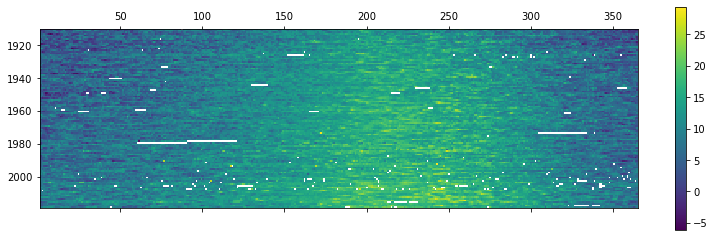

In [6]:
pp.matshow(allyears['TMIN'],extent=[1,365,2019,1910])
pp.colorbar()
pp.show()

In [7]:
tmin_record = np.nanmin(allyears['TMIN'],axis = 0)
tmax_record = np.nanmax(allyears['TMAX'],axis = 0)

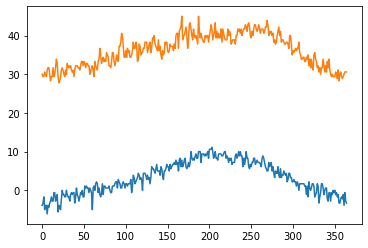

In [9]:
pp.plot(tmin_record)
pp.plot(tmax_record)
pp.show()

In [11]:
normal = np.vstack([getweather.getyear('PASADENA',['TMIN','TMAX'],year) 
                                      for year in range(1981,2011)])

In [12]:
tmin_normal = np.nanmean(normal['TMIN'],axis = 0)
tmax_normal = np.nanmean(normal['TMAX'],axis = 0)

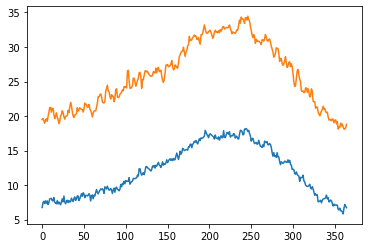

In [13]:
pp.plot(tmin_normal)
pp.plot(tmax_normal)
pp.show()

In [14]:
station , year = 'PASADENA', 2018

thisyear = getweather.getyear(station, ['TMIN','TMAX'],year)

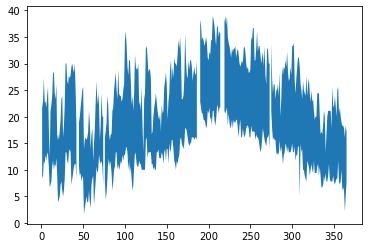

In [15]:
days = np.arange(1,366)
pp.fill_between(days, thisyear['TMIN'],thisyear['TMAX'])
pp.show()

In [16]:
avg = 0.5 * (np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))
avg

19.4620142532151

In [17]:
f'{station}, {year} : average temperature = {avg: .2f}C'  #formatted string

'PASADENA, 2018 : average temperature =  19.46C'

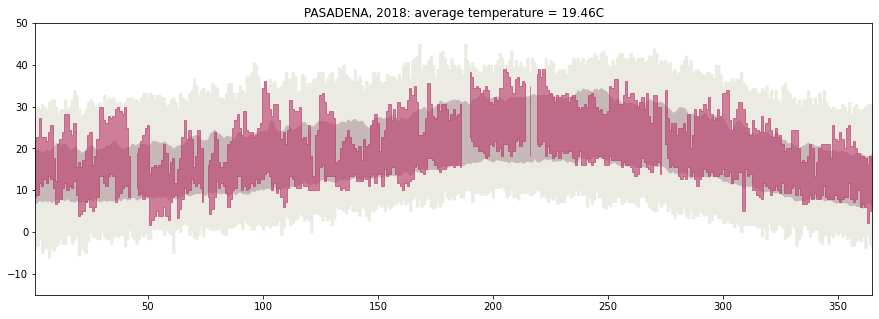

In [20]:
pp.figure(figsize=(15,5))

pp.fill_between(days, tmin_record, tmax_record,color = (0.92,0.92,0.89), step = 'mid')
pp.fill_between(days, tmin_normal, tmax_normal, color = (0.78,0.72,0.72))

pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], 
               color = (0.73, 0.21,0.41), alpha = 0.6, step = 'mid')

pp.axis(xmin = 1, xmax = 365, ymin = -15, ymax = 50)

pp.title(f'{station}, {year}: average temperature = {avg:.2f}C')
pp.show()

In [21]:
def nyplot(station, year):
    pp.figure(figsize=(15,5))
    
    allyears = np.vstack([getweather.getyear(station,['TMIN','TMAX'],year)
                     for year in range(1910,2020)])
    
    normal = np.vstack([getweather.getyear(station,['TMIN','TMAX'],year) 
                                      for year in range(1981,2011)])
    
    tmin_record = np.nanmin(allyears['TMIN'],axis = 0)
    tmax_record = np.nanmax(allyears['TMAX'],axis = 0)
    
    tmin_normal = np.nanmean(normal['TMIN'],axis = 0)
    tmax_normal = np.nanmean(normal['TMAX'],axis = 0)
        
    pp.fill_between(days, tmin_record, tmax_record,color = (0.92,0.92,0.89), step = 'mid')
    pp.fill_between(days, tmin_normal, tmax_normal, color = (0.78,0.72,0.72))

    pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], 
                   color = (0.73, 0.21,0.41), alpha = 0.6, step = 'mid')

    pp.axis(xmin = 1, xmax = 365, ymin = -15, ymax = 50)

    pp.title(f'{station}, {year}: average temperature = {avg:.2f}C')
    pp.show()

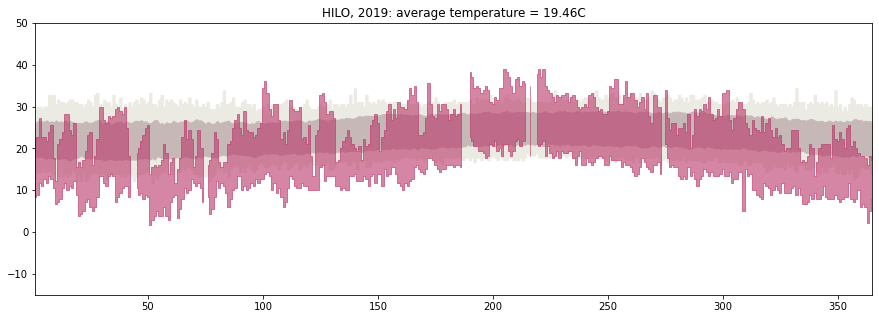

In [22]:
nyplot('HILO',2019)

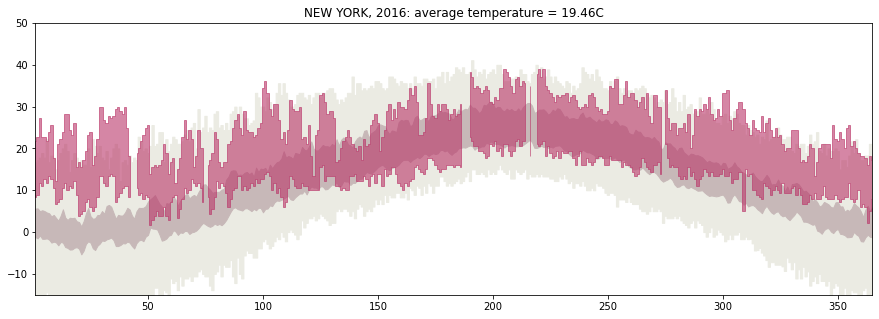

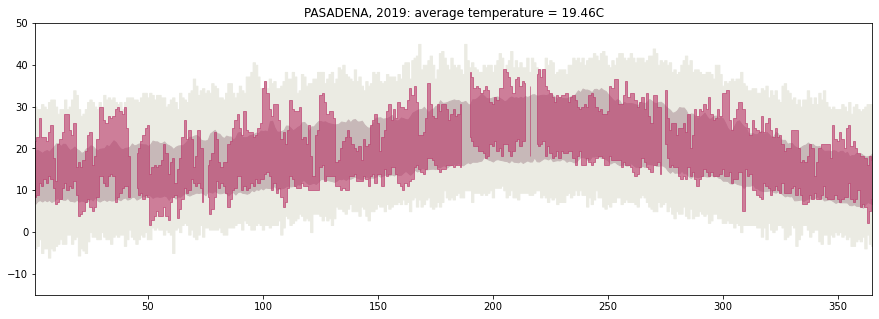

In [26]:
nyplot('NEW YORK',2016)
nyplot('PASADENA', 2019)

### EOD